# **Project 3**, APS1070 Fall 2021
#### **PCA [10 marks]**
**Deadline: Nov 5th, 21:00**       
** (My deadline has been Extended till Nov 7,21:00 due to medical reasons.)**

**Academic Integrity**

This project is individual - it is to be completed on your own. If you have questions, please post your query in the APS1070 Piazza Q&A forums (the answer might be useful to others!).

Do not share your code with others, or post your work online. Do not submit code that you have not written yourself. Students suspected of plagiarism on a project, midterm or exam will be referred to the department for formal discipline for breaches of the Student Code of Conduct.

Please fill out the following:


*   **Name**: Rahul Gupta
*   **Student number**: 1008661958



In this project we work on a Covid-19 dataset that reports the number  cases for different countries at the end of each day.

# Part 1: Getting started [1 Marks]

In [ ]:
import pandas as pd
cases_raw = pd.read_csv(
    filepath_or_buffer='https://raw.githubusercontent.com/aps1070-2019/datasets/master/confirmed-june21.csv',
    index_col=0,
    thousands=','
)

1. Write a function to do the following: **[0.25]**
    * Takes the dataframe, and your country list as inputs (US, China, Canada, ...)
    * Plots time-series for the input list (it is best to plot each country in a separate graph (subplot), so you can easily compare them.)
    
2. Apply `StandardScalar` to the data. Each day should have a `mean` of zero and a `StD` of 1. **[0.25]**
3. Run the function in `step 1` on the standardized dataset for the `US`, `China`, and `Canada`.   **[0.25]**
4. Discuss the trends in the standardized time-series for the `US`, `Canada`, and `China`. What does it mean if the curve goes up or down (are the number of covid cases negative?) What does the sign of values indicate? **[0.25]**

In [ ]:
names = list(cases_raw.index)
names[0:7]
names.index('Afghanistan')
c = ['US','Afghanistan']

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

def plot1(data,country):

  names = list(cases_raw.index)
  indices1=[]
  for i in country :
    indices = []
    indices = names.index(i)
    indices1 = np.append(indices1,indices)
  

  fig,axes = plt.subplots(2,2, figsize=(18,10))                                 # reference is tutorial 3
  fig.suptitle('Standardized data graph')
  for k,j in enumerate(indices1):
    axes.flat[k].plot(data[int(j),:])
    axes.flat[k].set(xlabel='Days',ylabel=country[k])                           # reference 1

  fig.delaxes(axes[1,1])                                                        # Reference 5




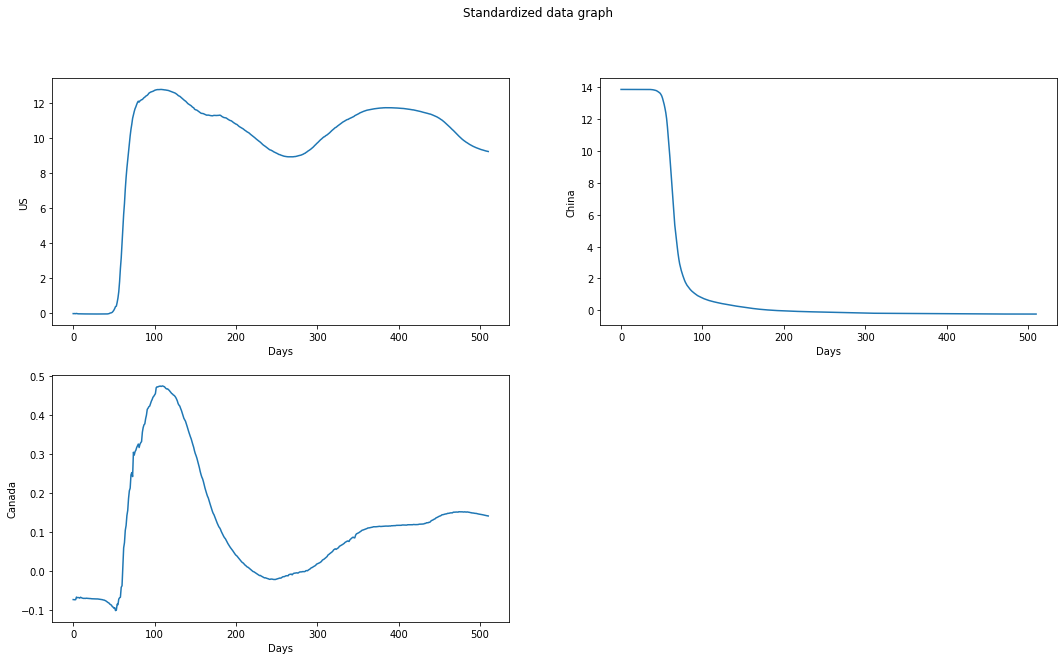

In [ ]:
df_std = StandardScaler().fit_transform(cases_raw)
plot1(df_std,['US','China','Canada'])

Answer: The ups and down indicates the Increment and decrement of covid cases. Sign of values indicates that particular countries cases change wrt other values.

# Part 2: Applying PCA [2 Marks]

1. Compute the covariance matrix of the dataframe. *Hint: The dimensions of your covariance matrix should be (511, 511).* **[0.25]**
2. Write a function `get_sorted_eigen(df_cov)` that gets the covariance matrix of dataframe `df` (from step 1), and returns sorted eigenvalues and eigenvectors using `np.linalg.eigh`. **[0.25]**
3. Show the effectiveness of your principal components in covering the variance of the dataset with a `scree plot`. **[0.25]**
4. How many PCs do you need to cover 99% of the dataset's variance? **[0.25]**
5. Plot the first 16 principal components (Eigenvectors) as a time series (16 subplots, on the x-axis you have dates and on the y-axis you have the value of the PC element) . **[0.5]**
6. Compare the first few PCs with the rest of them. Do you see any difference in their trend? **[0.5]**

In [ ]:
### YOUR CODE HERE ###

n,m = df_std.shape

C1 = np.dot(df_std.T,df_std)/(n-1)   ## Covariance matrix ## Answer 1

def get_sorted_eigen(df_cov):          ## Answer 2
  eigenValues, eigenVectors = np.linalg.eigh(df_cov)
  args = (-eigenValues).argsort()
  eigenValues = eigenValues[args]
  eigenVectors = eigenVectors[:, args]

  return eigenValues,eigenVectors

eig_val,eig_vec = get_sorted_eigen(C1)

sum_eig = sum(eig_val)
expvar = [eigV/sum_eig*100 for eigV in eig_val]
cumu_var = np.cumsum(expvar)

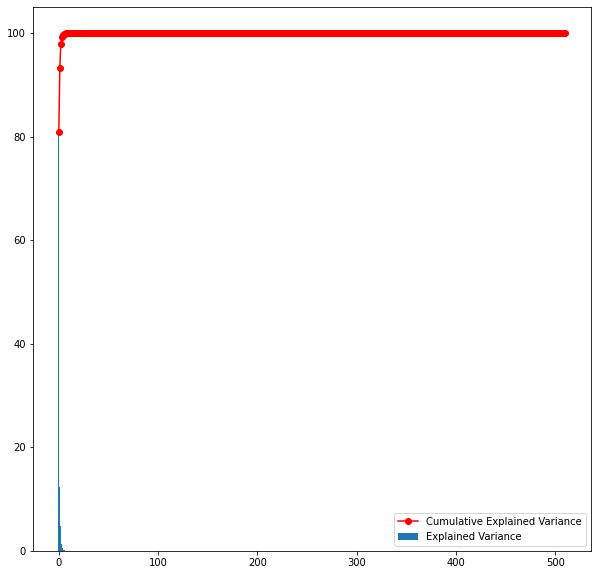

In [ ]:
#### Answer 3
plt.figure(figsize=(10,10))       # reference 2
plt.bar(range(511), expvar, label='Explained Variance')
plt.plot(cumu_var, 'r-o', label='Cumulative Explained Variance')
plt.legend()
plt.show()

In [ ]:
#Answer 4
np.where(cumu_var>99)[0][0]

# Therefore, Since Cumulative variance  position is at 3, we need only '4' principal components to get variance > 99.

3

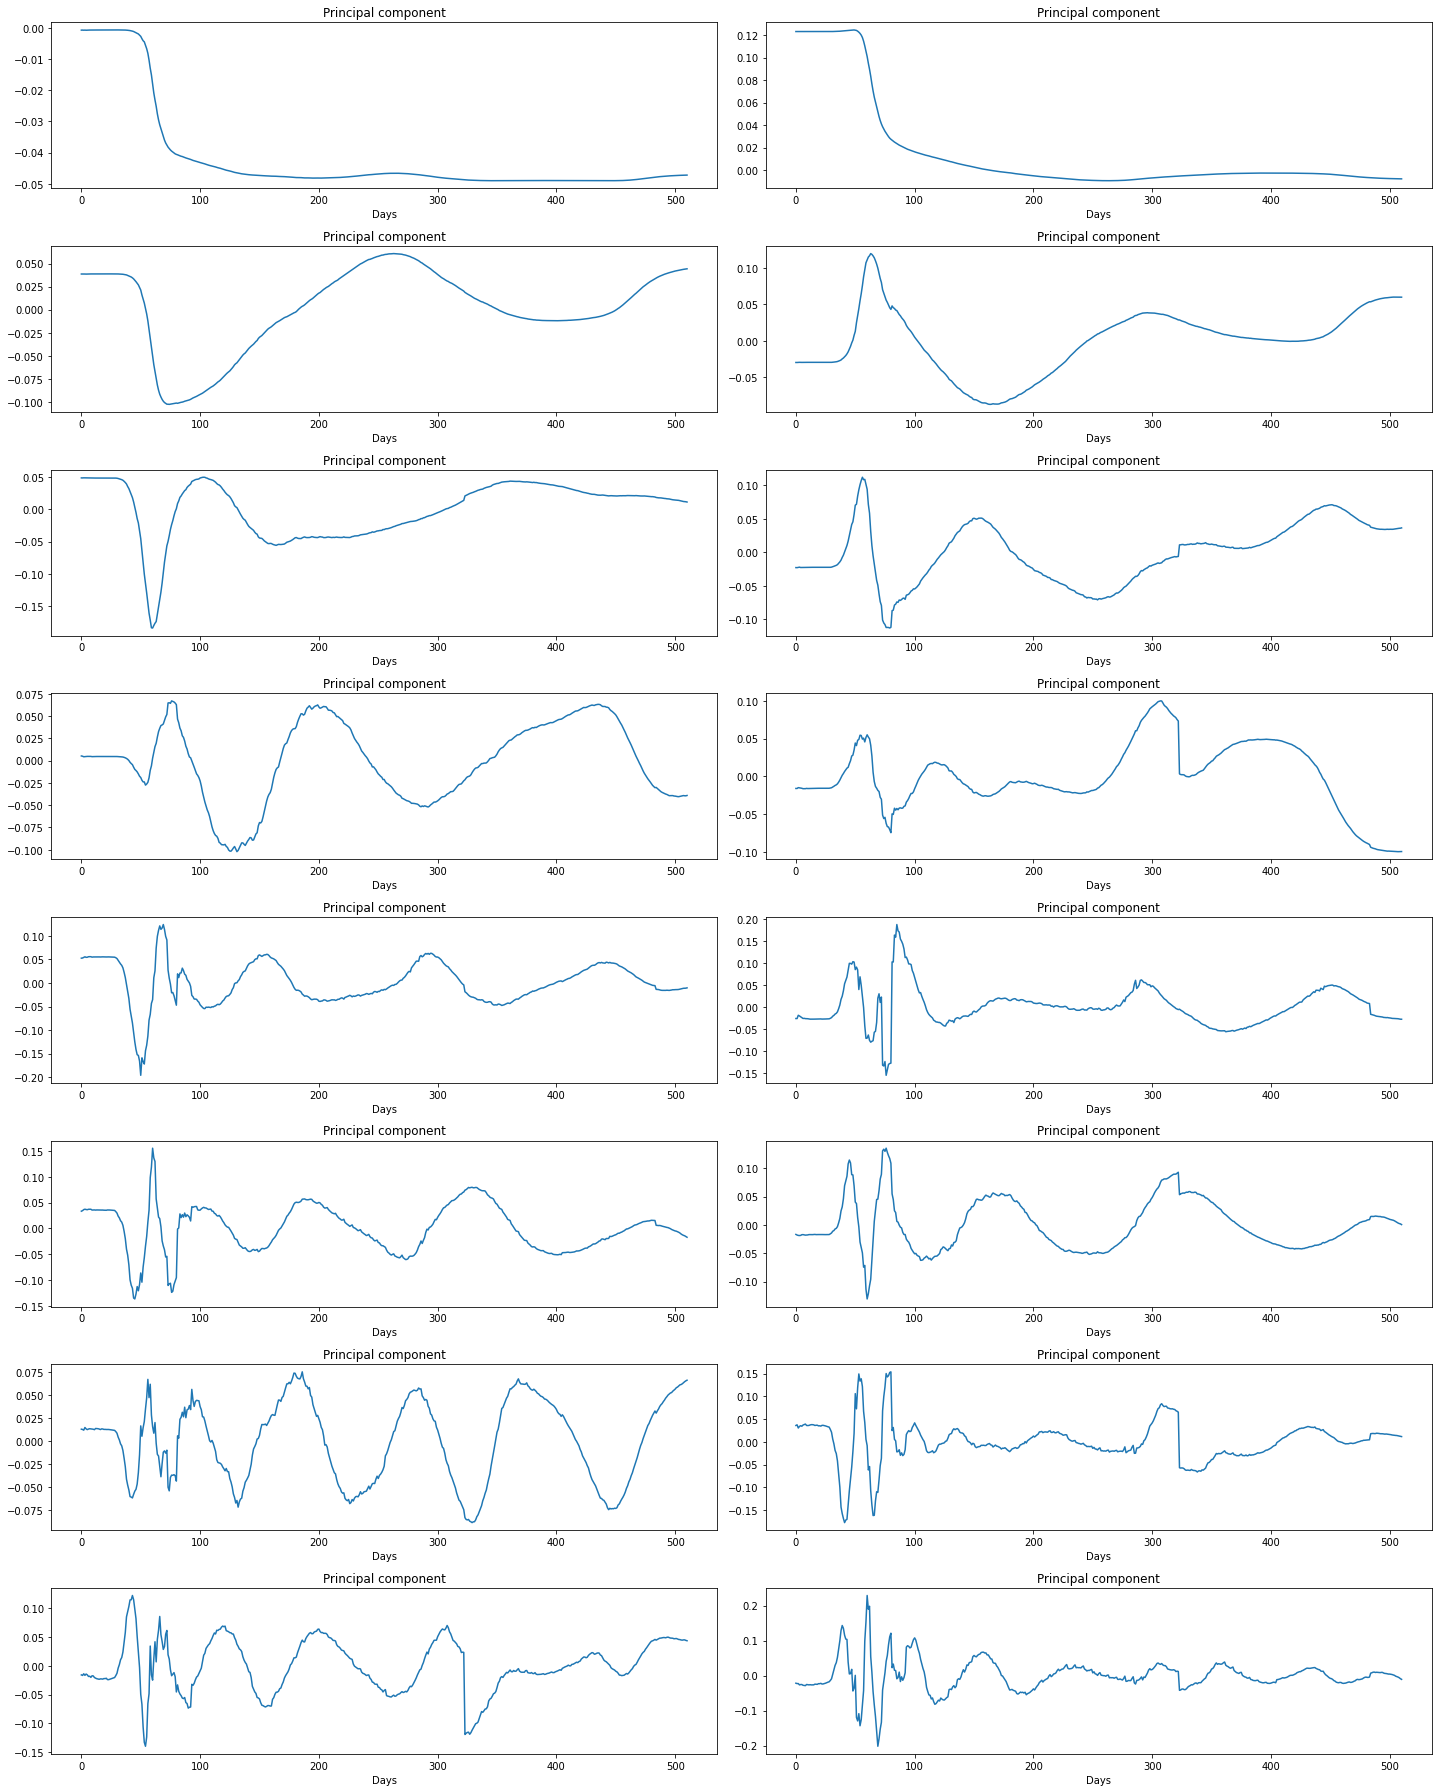

In [ ]:
# Answer 5

fig1,axs1 = plt.subplots(8,2,figsize=(20,25))
#fig1.suptitle("Principal component 1-16 vs Days")
for l in range(16):
  axs1.flat[l].plot(eig_vec[:,l])
  axs1.flat[l].set(xlabel='Days',title='Principal component') 


fig1.tight_layout()                     # reference 3

**Answer 4 ** : We need 4 Principal components to cover 99% of data variance.

**Answer 6** : By comparing the first few graphs with the rest of them, we can infer that as eigen values decreases , more and more variations can be seen in the graph. Lots of ups and downs can be seen in the span of 100 days in the final graphs.

# Part 3: Data reconstruction [3 Marks]

Create a function that:

*   Accepts a country and the original dataset as inputs.
*   Calls useful functions that you designed in previous parts to compute eigen vectors and eigen values. 
*   Plots 4 figures:
  1.   The original time-series for the specified country. **[0.5]**
  2.   The incremental reconstruction of the **original** (not standardized) time-series for the specified country in a single plot. **[1.5]**
       * You should at least show 5 curves in a figure for incremental reconstruction. For example, you can pick the following (or any other combination that you think is reasonable): 
          * Reconstruction with only PC1
          * Reconstruction with both PC1 and PC2
          * Reconstruction with PC1 to PC4 (First 4 PCs)
          * Reconstruction with PC1 to PC8 (First 8 PCs)
          * Reconstruction with PC1 to PC16 (First 16 PCs)

      * Hint: you need to compute the reconstruction for the standardized time-series first, and then scale it back to the original (non-standardized form) using the StandardScaler `inverse_transform` [help...](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler.inverse_transform)
  3.   The residual error for your best reconstruction with respect to the original time-series. **[0.5]**
      * Hint: You are plotting the error that we have for reconstructing each day `(df - df_reconstructed)`. On the x-axis, you have dates, and on the y-axis, the residual error. 
  4.   The RMSE of the reconstruction as a function of the number of included components (x-axis is the number of components and y-axis is the RMSE). Sweep x-axis from 1 to 10 (this part is independent from part 3.2.) **[1]**

Test your function using the `US`, `Canada`, and `China` as inputs. **[0.5]**


In [ ]:
from sklearn.metrics import mean_squared_error
import math

def plot_country_figures(original_df, country_name):
### YOUR CODE HERE ###
  scaler = StandardScaler()

  df_std1 = scaler.fit_transform(original_df)
  
  n1,m1 = df_std1.shape
  C = np.dot(df_std1.T,df_std1)/(n1-1)

  eig_val1,eig_vec1 = get_sorted_eigen(C)

  indx = int(names.index(country_name))

  fig2,axs2 = plt.subplots(2,2,figsize=(20,20))

  ############################ plot1 ##############################

  axs2[0,0].plot(original_df.values[indx,:])
  axs2[0,0].set(xlabel='Days',title='Original time series')

  ############################ plot 2 #############################

  #1 reconstruction with PC1
  x= 1
  w = eig_vec1[:,0:x]
  projx = np.dot(df_std1, w)
  Reconx = np.dot(projx, w.T)
  inc_reconx = scaler.inverse_transform(Reconx)
  axs2[0,1].plot(inc_reconx[indx,:],label='PC1')
  axs2[0,1].set(xlabel='Days',title='Reconstruction of original data with different PCs vs Days')

  #2 reconstruction with PC1 and PC2
  x1= 2
  w1 = eig_vec1[:,0:x1]
  projx1 = np.dot(df_std1, w1)
  Reconx1 = np.dot(projx1, w1.T)
  inc_reconx1 = scaler.inverse_transform(Reconx1)
  axs2[0,1].plot(inc_reconx1[indx,:],label='PC1,PC2')
  axs2[0,1].set(xlabel='Days')

  #3 reconstruction with PC1 to PC4
  x2= 4
  w2 = eig_vec1[:,0:x2]
  projx2 = np.dot(df_std1, w2)
  Reconx2 = np.dot(projx2, w2.T)
  inc_reconx2 = scaler.inverse_transform(Reconx2)
  axs2[0,1].plot(inc_reconx2[indx,:],label='PC1 to PC4')
  axs2[0,1].set(xlabel='Days')

  #4 reconstruction with PC1 to PC8
  x3= 8
  w3 = eig_vec1[:,0:x3]
  projx3 = np.dot(df_std1, w3)
  Reconx3 = np.dot(projx3, w3.T)
  inc_reconx3 = scaler.inverse_transform(Reconx3)
  axs2[0,1].plot(inc_reconx3[indx,:],label='PC1 to PC8')
  axs2[0,1].set(xlabel='Days')

  #5 reconstruction with PC1 to PC16
  x4= 16
  w4 = eig_vec1[:,0:x4]
  projx4 = np.dot(df_std1, w4)
  Reconx4 = np.dot(projx4, w4.T)
  inc_reconx4= scaler.inverse_transform(Reconx4)
  axs2[0,1].plot(inc_reconx4[indx,:],label='PC1 to PC16')
  axs2[0,1].set(xlabel='Days')

  axs2[0,1].legend()

  ############################### plot 3 ######################################
   
   # Answer for choosing best plot:-   Curve of Reconstruction of PC1 to Pc16 matches more accurately to original time series as compared to our other reconstructions. So we will be choosing it.
  error = original_df.values[indx,:]-inc_reconx4[indx,:]
  #error = df_std1[indx,:]-Reconx4[indx,:]                                      # for error on Standardised data
  axs2[1,0].plot(error,label='Residual Error',color='orange')
  axs2[1,0].set(xlabel='Days',title='Residual error on best reconstructed data')
  axs2[1,0].legend()

  ################################ plot 4 #####################################
  list_rmse = []
  for i in range(1,11):
    
    wi = eig_vec1[:,0:i]
    projxi = np.dot(df_std1, wi)
    Reconxi = np.dot(projxi, wi.T)
    inc_reconxi= scaler.inverse_transform(Reconxi)
    
    od = original_df.values[indx,:]
    inc= inc_reconxi[indx,:]
    mse = mean_squared_error(od,inc)
    rmse = math.sqrt(mse)
    list_rmse.append(rmse)
  
  axs2[1,1].plot(list_rmse,label='RMSE',color='green')
  axs2[1,1].set(xlabel='Principal components',title='RMSE vs Principal components')
  axs2[1,1].legend()


  
 





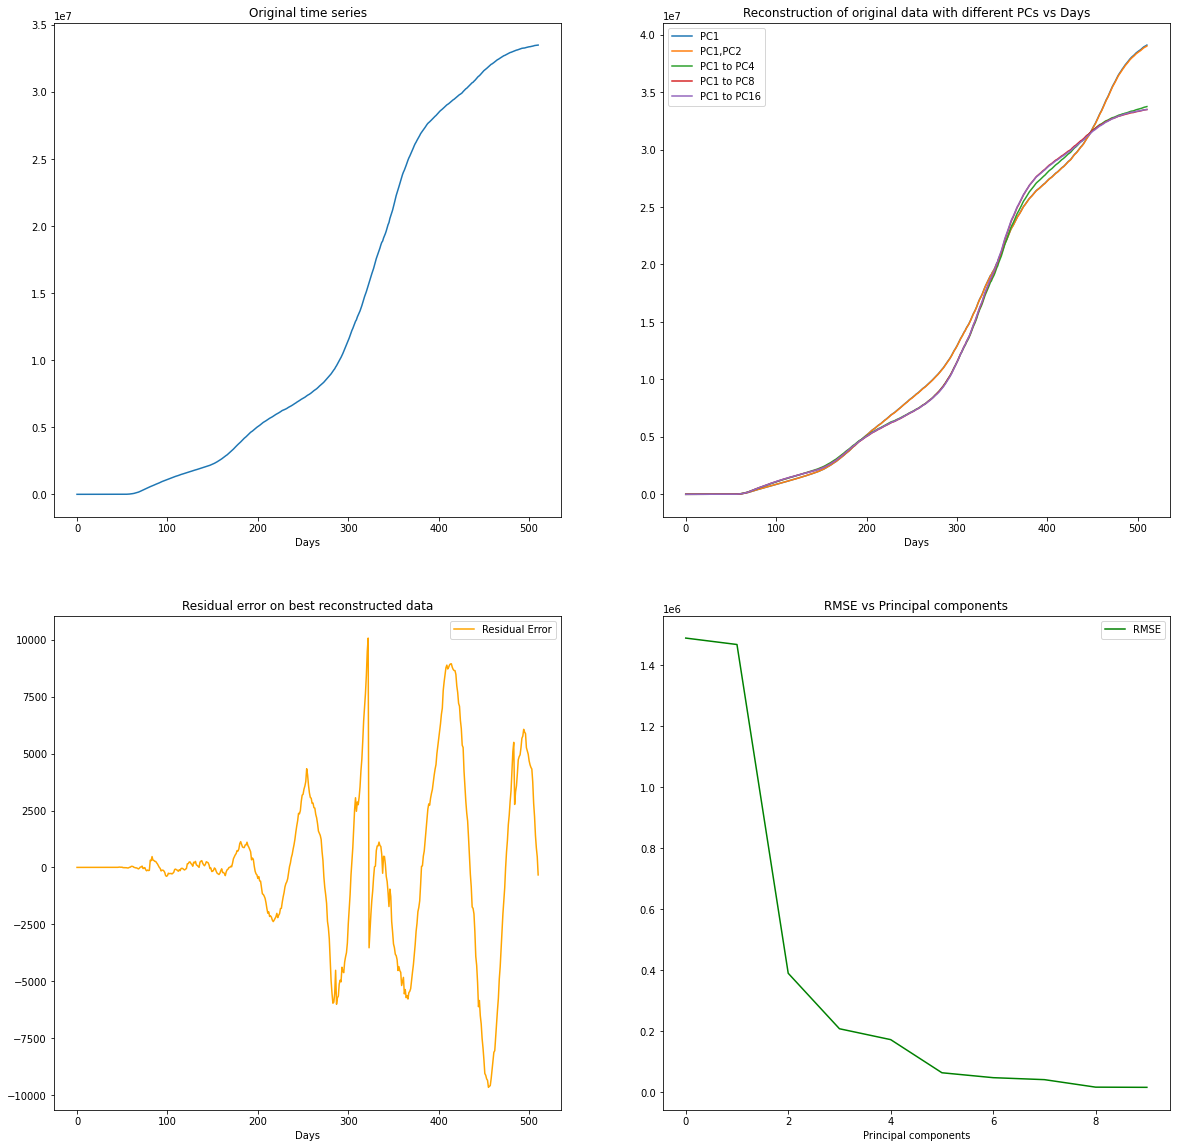

In [ ]:
plot_country_figures(cases_raw,'US')

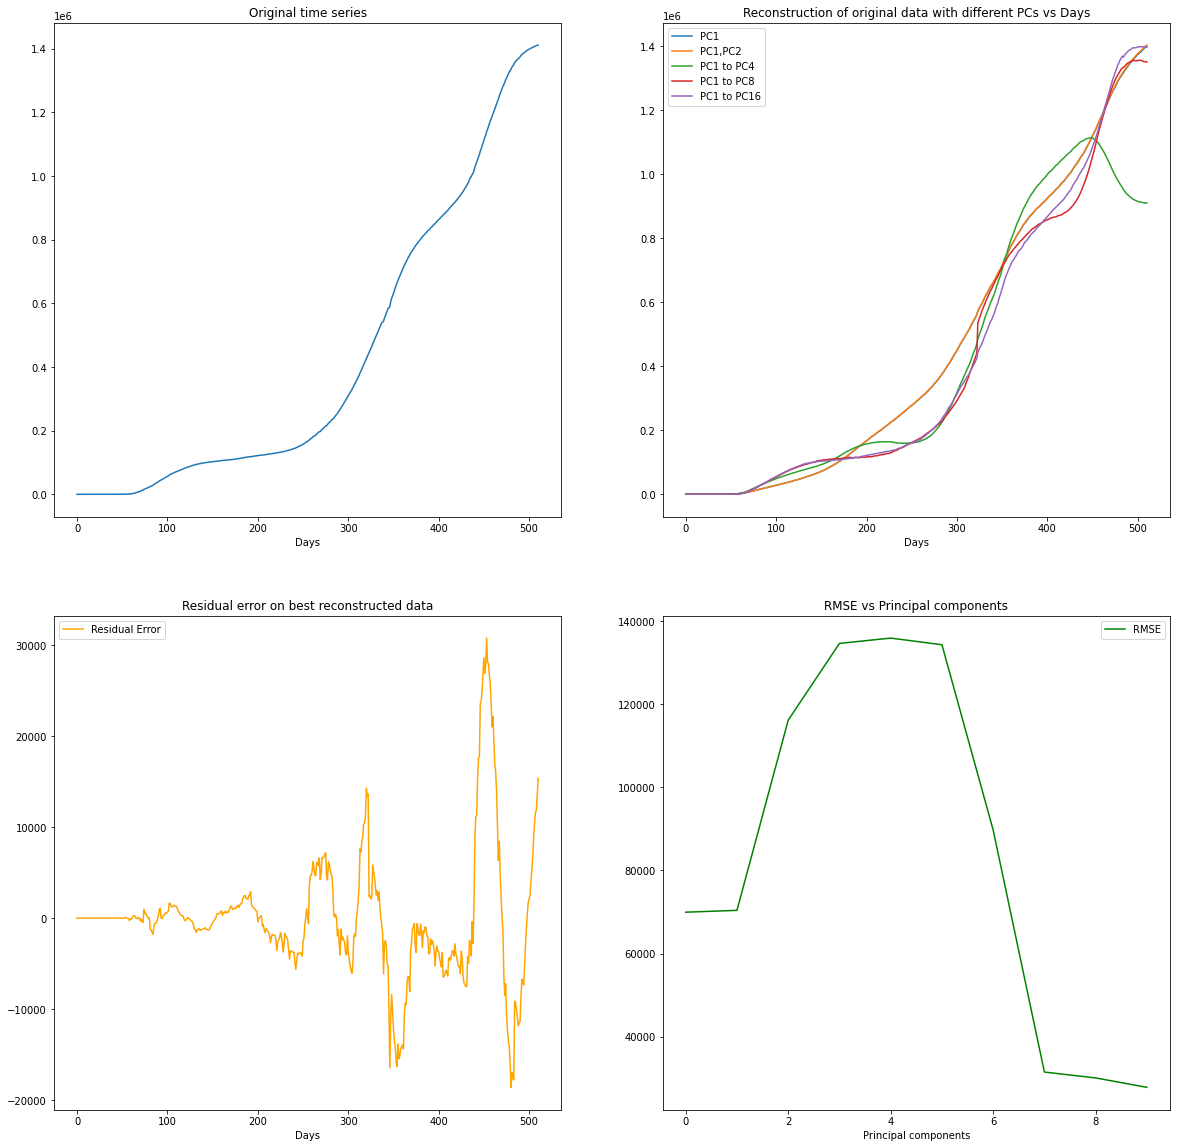

In [ ]:
plot_country_figures(cases_raw,'Canada')

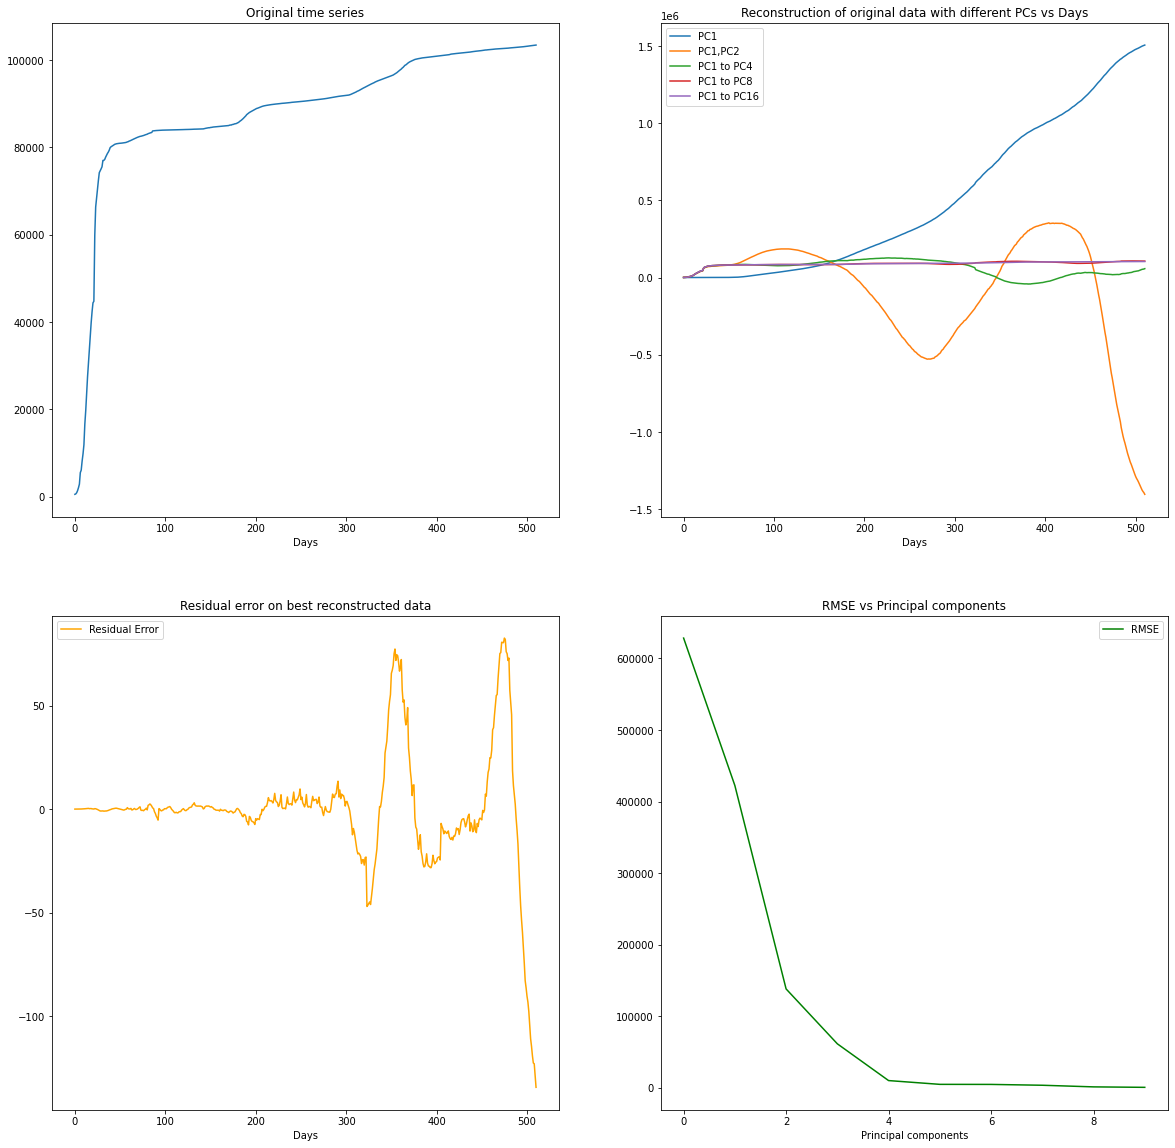

In [ ]:
plot_country_figures(cases_raw,'China')

# Part 4: SVD [2 Marks]
Modify your code in part 3 to use SVD instead of PCA for extracting the eigenvectors. **[1]**

Explain if standardization or covariance computation is required for this part.
Repeat part 3 and compare your PCA and SVD results. **[1]**



In [ ]:
### YOUR CODE HERE ###

def plot_svd_country_figures(data,cntry_name,namesx):

  scaler = StandardScaler()
  df_std1 = scaler.fit_transform(data)

  # Calculation SVD
  U,S,V = np.linalg.svd(df_std1)

  ############## Answer 1: Eigen Vectors are in row wise in Right singular matrix , V.

  indx = int(namesx.index(cntry_name))

  fig2,axs2 = plt.subplots(2,2,figsize=(20,20))

    ############################ plot1 ##############################

  axs2[0,0].plot(data.values[indx,:])
  axs2[0,0].set(xlabel='Days',title='Original time series')

  ############################ plot 2 #############################

    #1 reconstruction with SV1
  x= 1

  u = U[:,0:x]
  v = V[0:x,:]
  Reconx = S[0]*u@v

  inc_reconx = scaler.inverse_transform(Reconx)
  axs2[0,1].plot(inc_reconx[indx,:],label='SV1')
  axs2[0,1].set(xlabel='Days',title='Reconstruction of original data using SVD with different SV vs Days')

  #2 reconstruction with SV1 and SV2
  x1= 2

  u1 = U[:,0:x1]
  v1 = V[0:x1,:]
  Reconx1 = S[0:x1]*u1@v1

  inc_reconx1 = scaler.inverse_transform(Reconx1)
  axs2[0,1].plot(inc_reconx1[indx,:],label='SV1,SV2')
  axs2[0,1].set(xlabel='Days')

  #3 reconstruction with SV1 to SV4
  x2= 4

  u2 = U[:,0:x2]
  v2 = V[0:x2,:]
  Reconx2 = S[0:x2]*u2@v2

  inc_reconx2 = scaler.inverse_transform(Reconx2)
  axs2[0,1].plot(inc_reconx2[indx,:],label='SV1 to SV4')
  axs2[0,1].set(xlabel='Days')

  #4 reconstruction with SV1 to SV8
  x3= 8

  u3 = U[:,0:x3]
  v3 = V[0:x3,:]
  Reconx3 = S[0:x3]*u3@v3

  inc_reconx3 = scaler.inverse_transform(Reconx3)
  axs2[0,1].plot(inc_reconx3[indx,:],label='SV1 to SV8')
  axs2[0,1].set(xlabel='Days')

  #5 reconstruction with SV1 to SV16
  x4= 16

  u4 = U[:,0:x4]
  v4 = V[0:x4,:]
  Reconx4 = S[0:x4]*u4@v4

  inc_reconx4= scaler.inverse_transform(Reconx4)
  axs2[0,1].plot(inc_reconx4[indx,:],label='SV1 to SV16')
  axs2[0,1].set(xlabel='Days')

  axs2[0,1].legend()

  ############################### plot 3 ######################################
   
   # Answer for choosing best plot:-   Curve of Reconstruction of SV1 to SV16 matches more accurately to original time series as compared to our other reconstructions. So we will be choosing it.
  error = data.values[indx,:]-inc_reconx4[indx,:]

  axs2[1,0].plot(error,label='Residual Error',color='orange')
  axs2[1,0].set(xlabel='Days',title='Residual error on best reconstructed data using SVD')
  axs2[1,0].legend()

  ################################ plot 4 #####################################
  list_rmse = []
  for i in range(1,11):
    
    ux = U[:,0:i]
    vx = V[0:i,:]
    Reconxi = S[0:i]*ux@vx
    inc_reconxi= scaler.inverse_transform(Reconxi)
    
    od = data.values[indx,:]  # original data
    inc= inc_reconxi[indx,:]  # reconstructed using SVD
    mse = mean_squared_error(od,inc)
    rmse = math.sqrt(mse)
    list_rmse.append(rmse)
  
  axs2[1,1].plot(list_rmse,label='RMSE',color='green')
  axs2[1,1].set(xlabel='Singular values',title='RMSE vs Singular values')
  axs2[1,1].legend()









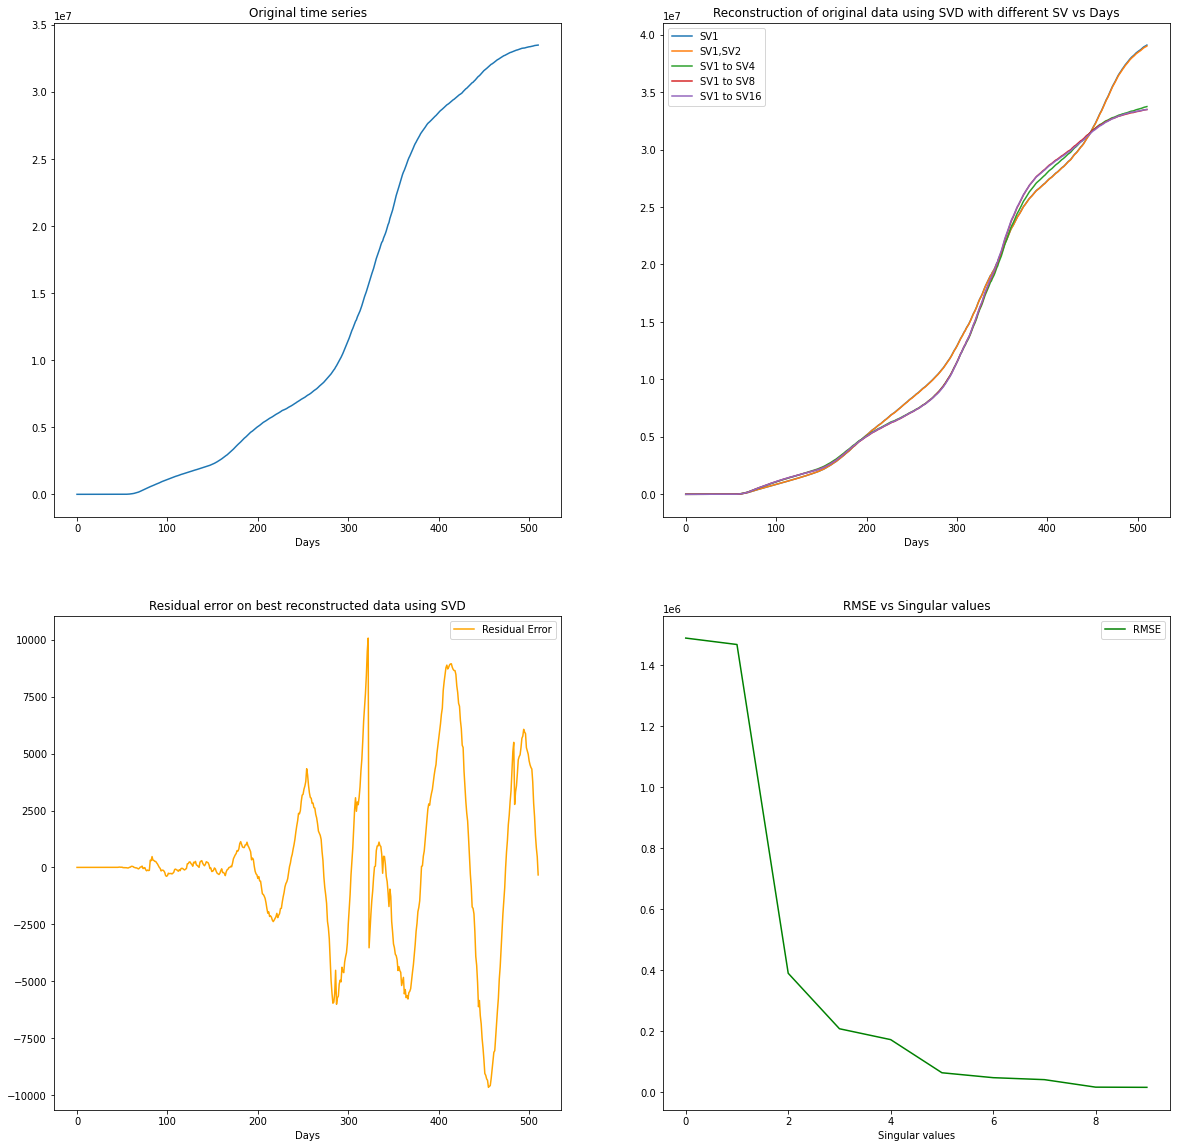

In [ ]:
plot_svd_country_figures(cases_raw,'US',names)

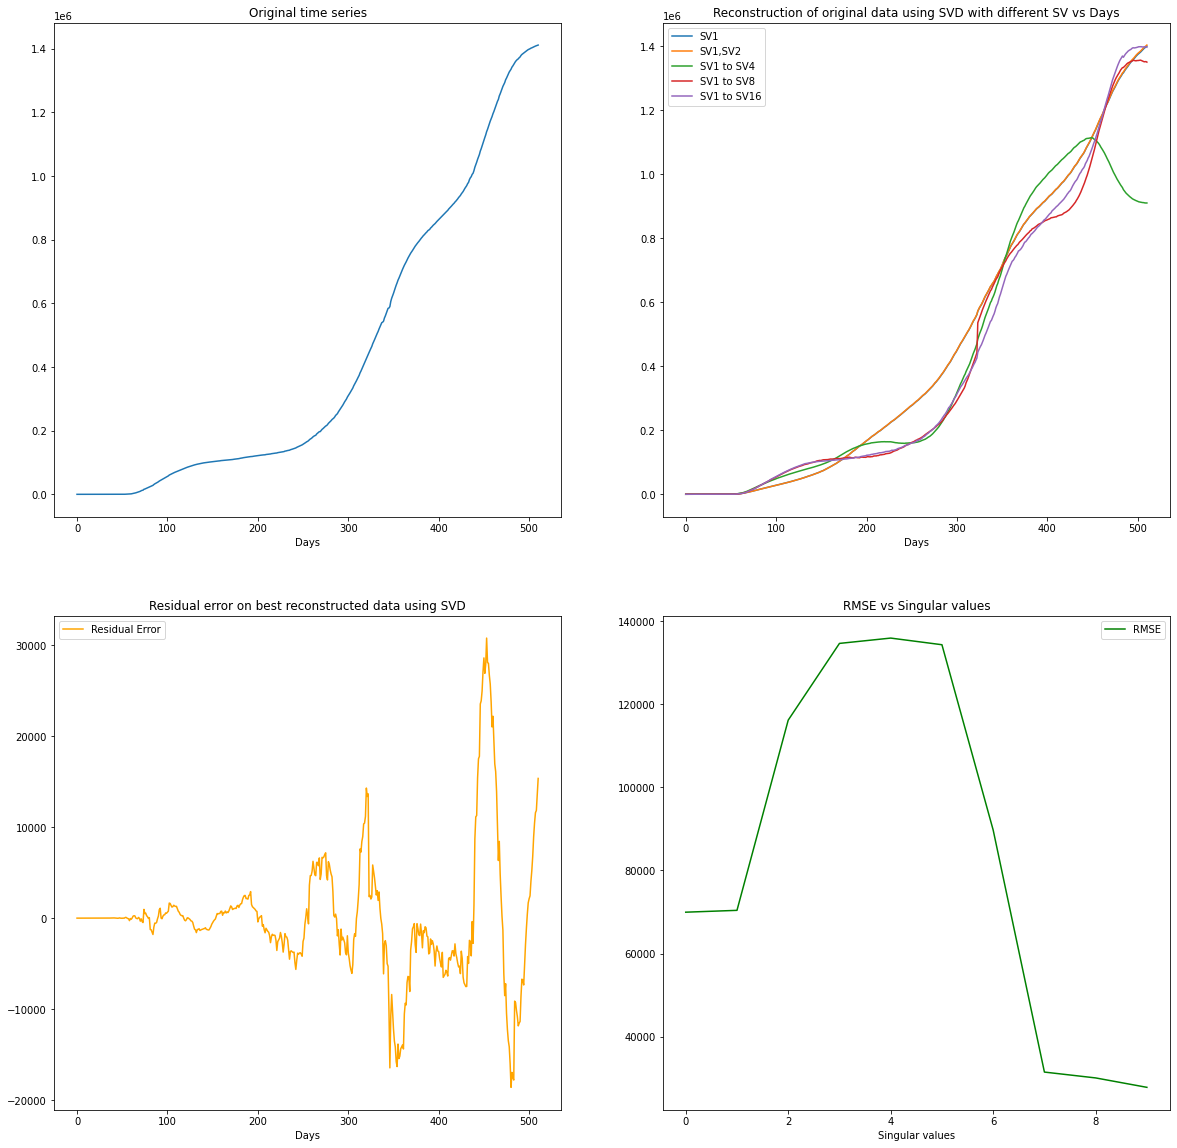

In [ ]:
plot_svd_country_figures(cases_raw,'Canada',names)

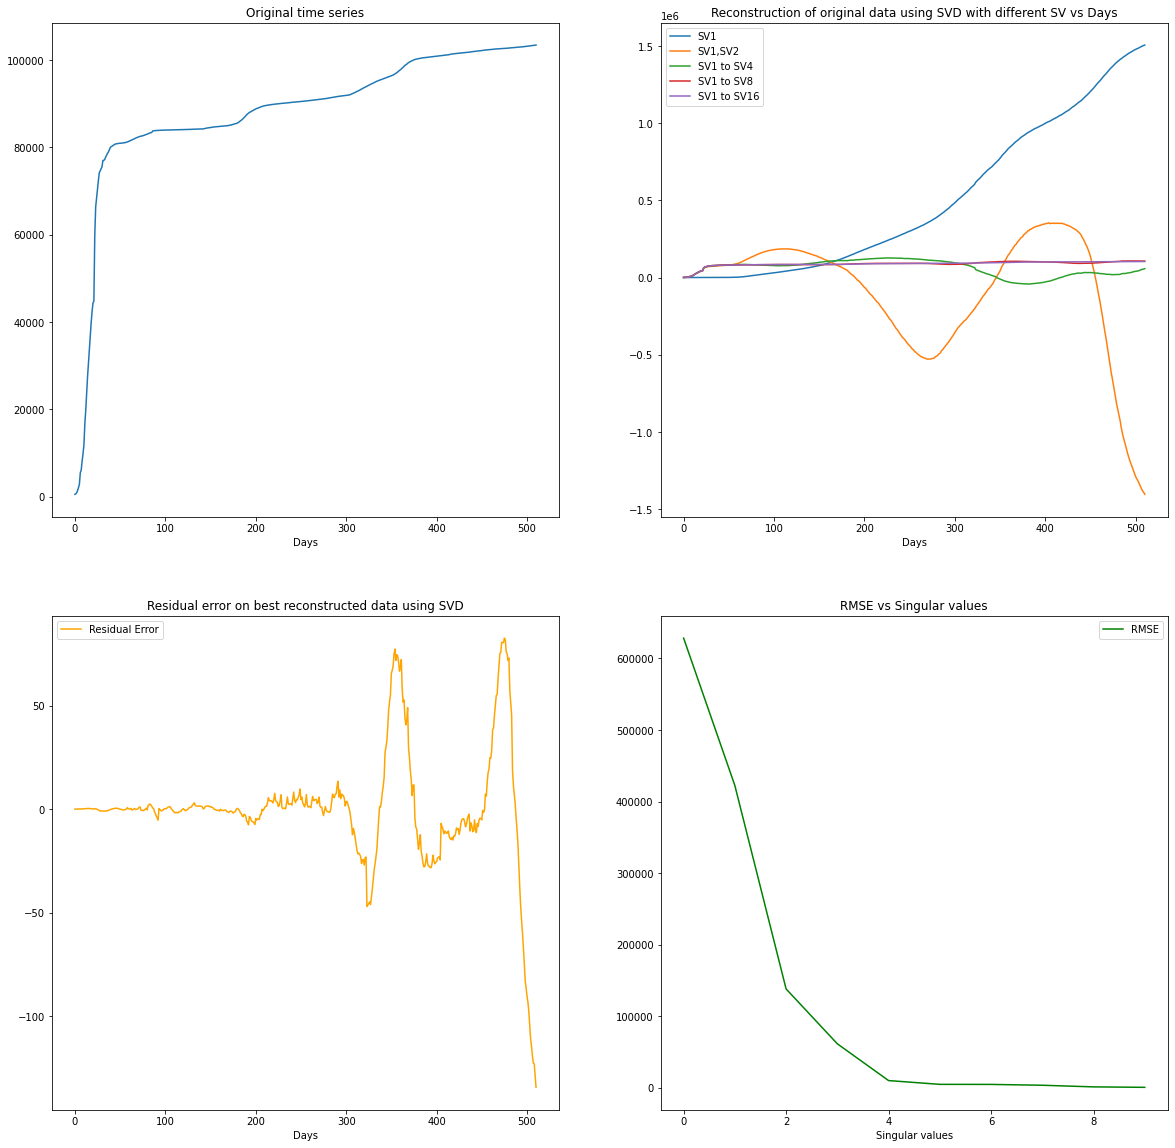

In [ ]:
plot_svd_country_figures(cases_raw,'China',names)

Note: I have added  third input namesx in the function so that this function can be used again in part 5 since there are 196 countries in the new dataset of part5.
Sorry for the inconvenience.

Answer: Yes standardization is important as we dont want feature scaling in account. Rather what we want is to see the feature's uniqueness.
(Reference 4)

# Part 5: Let's collect a more recent dataset! [2 Marks]
Create a more recent dataset similar to the one provided in your handout using the raw information provided [here](https://datahub.io/core/covid-19#resource-time-series-19-covid-combined). **[1]**

You need to manipulate the data to organize it in the desired format. You are free to use any tools you like, from Excel to Python!
 
In the end, you should have a new CSV file with more dates (features) compared to the provided dataset. 


Upload your new dataset (in CSV format) to your colab notebook and repeat part 4. **[1]**


Don't forget to add your new CSV file to your GitHub repo. The code below helps you to upload your new CSV file to your colab session. 




In [ ]:
# Note: I have directly uploaded the csv file containing raw info named: 'time-series-19-covid-combined_csv.csv'  in colab which i downloaded from the above website 
#       and then with the help of pandas cleaned it and structured it so that the new dataset can fit to part 4.
#       So, in the Quercus and Github i will be uploading the raw info csv file 'time-series-19-covid-combined_csv.csv'. You can find new dataset below in the code with name 'df3'

In [ ]:
# load (time-series-19-covid-combined_csv.csv).csv to Google Colab
from google.colab import files
uploaded = files.upload()

Saving time-series-19-covid-combined_csv.csv to time-series-19-covid-combined_csv.csv


In [ ]:
df_new = pd.read_csv('time-series-19-covid-combined_csv.csv')
df_new = df_new.drop(['Province/State','Recovered','Deaths'],axis=1)

a= df_new.groupby('Country/Region')
xx= a.first()

xc =a.get_group('Afghanistan')
lat = xc.T

dates = lat.iloc[0,:650].values # dates
names11 = list(xx.index)        # names of country

In [ ]:
values1 = np.array([])

# making numpy array of all the values
for i in range(len(names11)):
  xc1 =a.get_group(names11[i])
  lat1 = xc1.T

  values = lat1.iloc[1,0:650].values
  values1 = np.append(values1,values,0)


############## Making dataframe ###############

values1 = values1.reshape(196,650)
values1 = values1.astype('int64')
df3 = pd.DataFrame(data=values1,index=names11,columns=dates)

df3.head()                                                                       # Printing first 5 rows.

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,2020-02-01,2020-02-02,2020-02-03,2020-02-04,2020-02-05,2020-02-06,2020-02-07,2020-02-08,2020-02-09,2020-02-10,2020-02-11,2020-02-12,2020-02-13,2020-02-14,2020-02-15,2020-02-16,2020-02-17,2020-02-18,2020-02-19,2020-02-20,2020-02-21,2020-02-22,2020-02-23,2020-02-24,2020-02-25,2020-02-26,2020-02-27,2020-02-28,2020-02-29,2020-03-01,...,2021-09-23,2021-09-24,2021-09-25,2021-09-26,2021-09-27,2021-09-28,2021-09-29,2021-09-30,2021-10-01,2021-10-02,2021-10-03,2021-10-04,2021-10-05,2021-10-06,2021-10-07,2021-10-08,2021-10-09,2021-10-10,2021-10-11,2021-10-12,2021-10-13,2021-10-14,2021-10-15,2021-10-16,2021-10-17,2021-10-18,2021-10-19,2021-10-20,2021-10-21,2021-10-22,2021-10-23,2021-10-24,2021-10-25,2021-10-26,2021-10-27,2021-10-28,2021-10-29,2021-10-30,2021-10-31,2021-11-01
Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,5,5,5,5,5,5,...,154800,154960,154960,154960,155072,155093,155128,155174,155191,155191,155191,155287,155309,155380,155429,155448,155466,155508,155540,155599,155627,155682,155688,155739,155764,155776,155801,155859,155891,155931,155940,155944,156040,156071,156124,156166,156196,156210,156250,156284
Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,165864,166690,167354,167893,168188,168782,169462,170131,170778,171327,171794,171794,172618,173190,173723,174168,174643,174968,175163,175664,176172,176667,177108,177536,177971,178188,178804,179463,180029,180623,181252,181696,181960,182610,183282,183873,184340,184887,185300,185497
Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,...,202283,202449,202574,202722,202877,203045,203198,203359,203517,203657,203789,203915,204046,204171,204276,204388,204490,204597,204695,204790,204900,205005,205106,205199,205286,205364,205453,205529,205599,205683,205750,205822,205903,205990,206069,206160,206270,206358,206452,206566
Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,15156,15167,15167,15167,15189,15192,15209,15222,15222,15222,15222,15267,15271,15284,15288,15291,15291,15291,15307,15307,15314,15326,15338,15338,15338,15367,15369,15382,15382,15404,15404,15404,15425,15425,15462,15505,15516,15516,15516,15516
Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,53840,54280,54795,55121,55583,56040,56583,56583,58076,58603,58943,58943,59895,60448,60803,61023,61245,61378,61580,61794,62143,62385,62606,62789,62842,63012,63197,63340,63567,63691,63775,63861,63930,64033,64126,64226,64301,64374,64433,64458


In [ ]:
# Answer Downloading the new dataframe in csv file:
df3.to_csv('New_cleaned_file.csv')

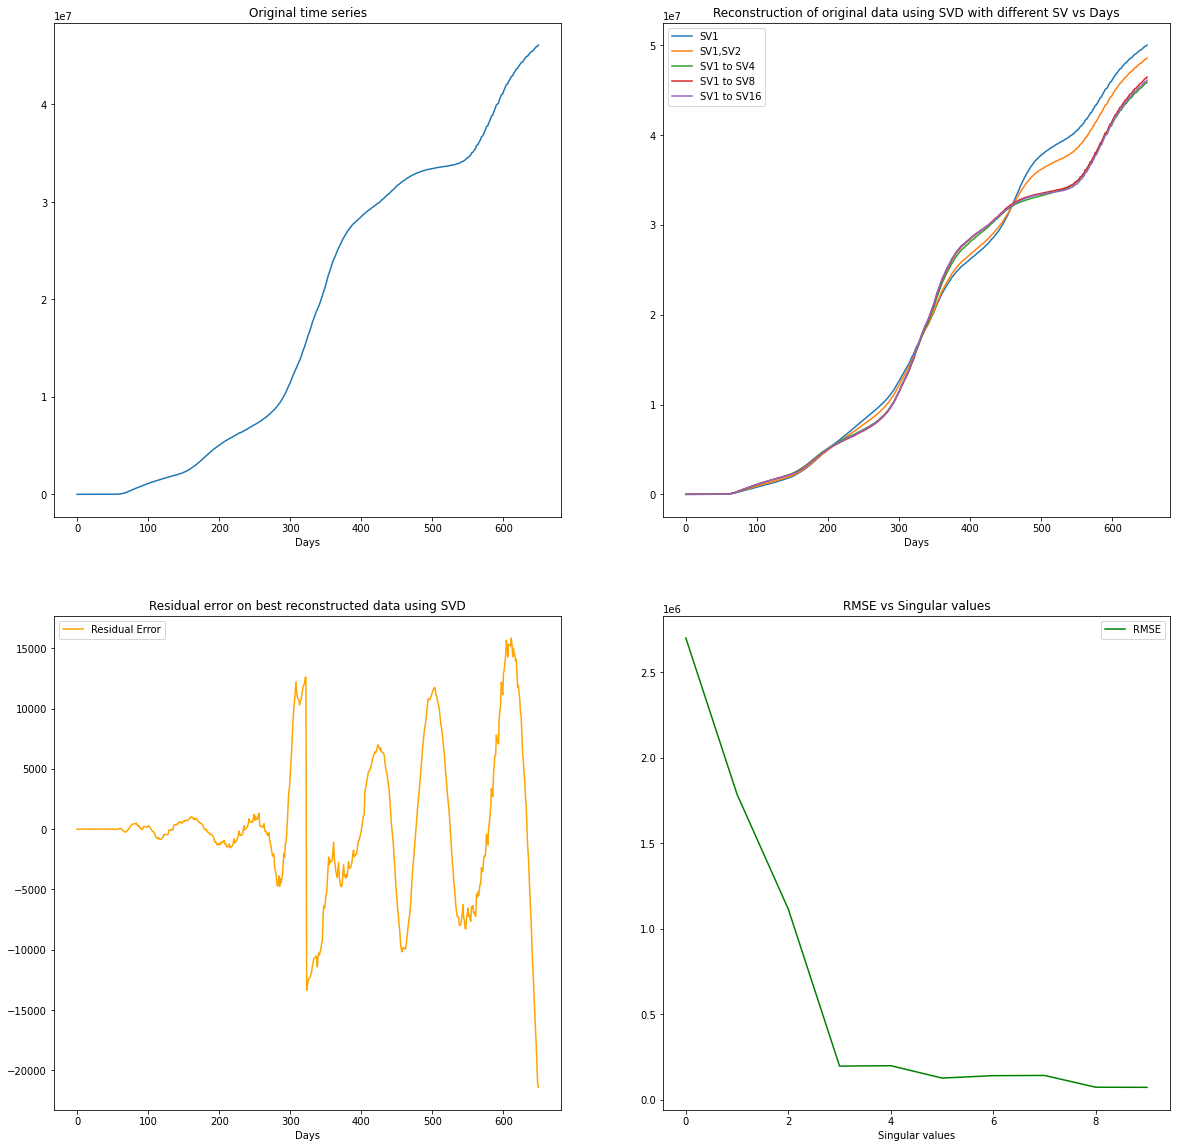

In [ ]:
# Answer 2:

plot_svd_country_figures(df3,'US',names11)

In [ ]:
plot_svd_country_figures(df3,'US',names11)

In [ ]:
plot_svd_country_figures(df3,'US',names11)

# References

Understanding PCA and SVD:

1. https://towardsdatascience.com/pca-and-svd-explained-with-numpy-5d13b0d2a4d8

2. https://stats.stackexchange.com/questions/134282/relationship-between-svd-and-pca-how-to-use-svd-to-perform-pca

3. https://stats.stackexchange.com/questions/2691/making-sense-of-principal-component-analysis-eigenvectors-eigenvalues

4. https://hadrienj.github.io/posts/Deep-Learning-Book-Series-2.8-Singular-Value-Decomposition/

PCA:

1. Snippets from: https://plot.ly/ipython-notebooks/principal-component-analysis/

2. https://www.value-at-risk.net/principal-component-analysis/

Covid Data:

1. https://www.worldometers.info/coronavirus/

2. https://datahub.io/core/covid-19#resource-time-series-19-covid-combined


Used references:
1.https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html
2.https://www.geeksforgeeks.org/change-plot-size-in-matplotlib-python/
3.https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html
4. https://stackoverflow.com/questions/42024705/should-i-perform-data-centering-before-apply-svd
5. https://stackoverflow.com/questions/14694501/delete-a-subplot

